In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import sympy as sy

In [3]:
skew = lambda x: np.array([[0, -x[2], x[1]],
                    [x[2], 0, -x[0]],
                    [-x[1], x[0], 0]])

In [38]:
g = 9.81
x, y = sy.symbols('x y') 
M = x**2 / 10**2
Mlam = sy.lambdify((x,y), M)
Mx = sy.lambdify((x,y), sy.diff(M, x))
My = sy.lambdify((x,y), sy.diff(M, y))

# make_q = lambda nhat, n:

0.0
0.0
0.0
0.0
0.0
3.7342202920144023e-07
3.7342202920144023e-07
1.4933907766781703e-06
1.4933907766781703e-06
3.359807081543427e-06
3.359807081543427e-06
1.98696019267982e-05
1.986936724850631e-05
1.562407891226413e-05
1.5623965218310547e-05
3.687386202606805e-05
3.687354889454751e-05
6.710712094892716e-05
6.710679668492112e-05
0.000106321304511883
0.00010632097453942595
0.00021167920767953434
0.00021167762478167777
0.000352905588493125
0.0003529063837881822
0.0005299564603495807
0.0005299572568423647
0.0007427678617571502
0.0007427678689317619
0.0009912631173583574
0.0009912631258704226
0.0019184975610161755
0.0019184978694602411
0.0031454285872109
0.003145429393099508
0.0046683713052568954
0.004668371904275171
0.006482743037816807
0.006482743867774147
0.008583078529714674
0.008583079508260984
0.010963039530874881
0.010963040476559773
0.014768996576194094
0.014768999388959453
0.01909076530145763
0.019090767893966094
0.02390238573220155
0.023902381630094616
0.02917485774328385
0.0291

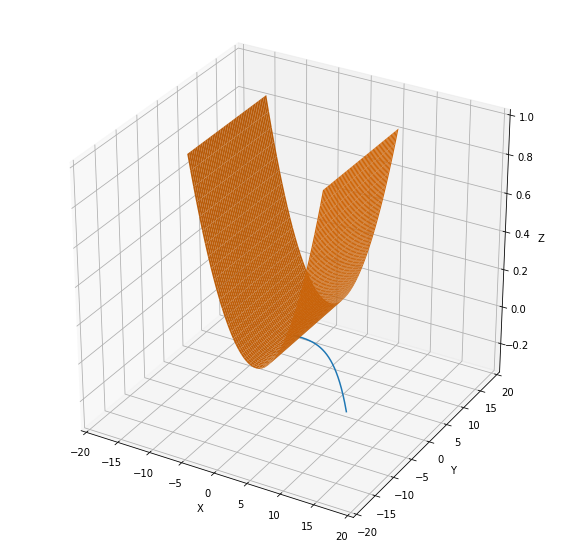

In [46]:
def system(y, t):
    i = 0
    p = y[0:3]
    v = y[3:6]
    R = y[6:].reshape((3,3))
    
    #calculate normal vector
    px = np.array([1,0,Mx(p[0], p[1])])
    py = np.array([0,1,My(p[0], p[1])])
    n = np.cross(px, py)
    nhat = n / np.linalg.norm(n)
    
    #make q
    ndot = np.zeros(3)
    angle = np.arccos(nhat[2])
    if nhat[2] == 1:
        q = 0
    else:
        q = -ndot[0] / np.sin( angle )
    print(angle)
    
    #make R dot
    wb = np.array([0, q, theta[i]])
    Rdot = R@skew(wb)
    #make p dot
    pdot = v
    #make v dot
    vdot = np.array([0,0,-g]) + g*nhat*np.cos(angle) + R@np.array([u[i],0,0])

    return tuple(pdot) + tuple(vdot) + tuple(Rdot.flatten())

N = 1000
theta = np.zeros(N)
u = np.ones(N)
t_array = np.linspace(0, 5, N)

p0 = np.zeros(3)
v0 = np.zeros(3)
theta0 = 0
R0 = np.array([[np.cos(theta0), -np.sin(theta0), 0],
              [np.sin(theta0), np.cos(theta0), 0],
              [0, 0, 1]])
y0 = np.concatenate((p0, v0, R0.flatten()))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

sol = odeint(system, y0, t_array)
ax.plot(sol[:,0], sol[:,1], sol[:,2])

x = np.linspace(-10,10)
y = np.linspace(-10,10)
X,Y = np.meshgrid(x,y)

ax.plot_surface(X,Y,Mlam(X,Y))
ax.set_ylim([-20,20])
ax.set_xlim([-20,20])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# # plt.savefig('HW3_2.png')
plt.show()